In [4]:
# ML AirFare Price Prediction 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_excel(r"C:\Users\Lenovo\Desktop\Machine Learning\ML Live Flight Fare Resourses16963295320.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
data.drop("Route",axis=1,inplace=True)
data.drop("Additional_Info",axis=1,inplace=True)

In [9]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Price              False
dtype: bool

In [10]:
data[data["Total_Stops"].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,7480


In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Price              False
dtype: bool

In [13]:
data["Journey_Date"]=pd.to_datetime(data["Date_of_Journey"]).dt.day
data["Journey_month"]=pd.to_datetime(data["Date_of_Journey"]).dt.month

In [14]:
data.drop("Date_of_Journey",axis=1,inplace=True)

In [15]:
data["Dep_Hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_Min"]=pd.to_datetime(data["Dep_Time"]).dt.minute

data["Arrival_Hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_Min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

In [16]:
data.drop(["Dep_Time","Arrival_Time"], axis=1 ,inplace=True)

In [17]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [18]:
data["Total_Stops"].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],[0,2,1,3,4],regex=True,inplace=True)

In [19]:
Airline=pd.get_dummies(data["Airline"])
Source=pd.get_dummies(data["Source"])
Destination=pd.get_dummies(data["Destination"])

In [20]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,11,30,14,10


In [21]:
data=pd.concat([data,Airline,Source,Destination],axis=1)

In [22]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_month,Dep_Hour,Dep_Min,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,...,False,False,True,False,True,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,...,False,True,False,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,...,False,False,True,False,True,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,19,55,...,False,False,True,False,True,False,False,False,False,False
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,20,45,...,False,False,True,False,True,False,False,False,False,False
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,8,20,...,False,False,False,False,False,False,True,False,False,False
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,11,30,...,False,False,False,False,False,False,False,False,False,True


In [23]:
data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [24]:
pd.set_option("display.max_columns",None)

In [25]:
data["Duration_hour"]=data["Duration"].str.split("h").str[0]

In [26]:
data["Duration_min"]=data["Duration"].str.split("h").str[1].str.split("m").str[0].str.strip()

In [27]:
data["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [28]:
data["Duration_hour"].replace("[m]","",regex=True,inplace=True)

In [29]:
data["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [30]:
data["Duration_min"].replace("",0,inplace=True)

In [31]:
data["Duration_min"].replace(np.nan,0,inplace=True)

In [32]:
data.drop("Duration",axis=1,inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   Journey_Date                       10682 non-null  int32 
 3   Journey_month                      10682 non-null  int32 
 4   Dep_Hour                           10682 non-null  int32 
 5   Dep_Min                            10682 non-null  int32 
 6   Arrival_Hour                       10682 non-null  int32 
 7   Arrival_Min                        10682 non-null  int32 
 8   Air Asia                           10682 non-null  bool  
 9   Air India                          10682 non-null  bool  
 10  GoAir                              10682 non-null  bool  
 11  IndiGo                             10682 non-null  bool  
 12  Jet Airwa

In [34]:
data[["Duration_min","Duration_hour"]]=data[["Duration_min","Duration_hour"]].astype(int)

In [35]:
data.columns


Index(['Total_Stops', 'Price', 'Journey_Date', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Duration_hour', 'Duration_min'],
      dtype='object')

In [36]:
data=data[['Total_Stops', 'Journey_Date', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Banglore', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Duration_hour', 'Duration_min','Price']]

In [37]:
data

,Total_Stops,Journey_Date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Banglore,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Banglore,Banglore,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Duration_hour,Duration_min,Price
0,0,24,3,22,20,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,2,50,3897
1,2,1,5,5,50,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,7,25,7662
2,2,9,6,9,25,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,19,0,13882
3,1,12,5,18,5,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,5,25,6218
4,1,1,3,16,50,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,4,45,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,2,30,4107
10679,0,27,4,20,45,23,20,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,2,35,4145
10680,0,27,4,8,20,11,20,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,3,0,7229
10681,0,1,3,11,30,14,10,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,2,40,12648


In [38]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7477, 38), (3205, 38), (7477,), (3205,))

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [43]:
print("Training Accuracy",model.score(x_train,y_train))
print("Testinig Accuracy",model.score(x_test,y_test))

Training Accuracy 0.6216960700942382
Testinig Accuracy 0.6263919372557317


In [44]:
from sklearn.linear_model import Lasso
model1=Lasso(alpha=10)
model1.fit(x_train,y_train)

Lasso(alpha=10)

In [45]:
print("Training Accuracy",model1.score(x_train,y_train))
print("Testinig Accuracy",model1.score(x_test,y_test))

Training Accuracy 0.6132720629190056
Testinig Accuracy 0.6213205878457586


In [46]:
# feature selection--jab number of columns jiydad ho or ccomplexity bad gai ho(numver of columns),---- feature selection bata hai ki number of columns important hai

In [47]:
data.corr()

,Total_Stops,Journey_Date,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Banglore,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Banglore,Banglore,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Duration_hour,Duration_min,Price
Total_Stops,1.000000,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,-0.094423,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.368324,0.032761,-0.234758,0.490170,-0.447390,0.032761,-0.234758,-0.260752,-0.368324,0.032761,0.490170,0.490170,-0.447390,-0.260752,0.032761,-0.234758,-0.015302,0.740049,-0.136749,0.603897
Journey_Date,-0.009451,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,0.008926,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,-0.050438,-0.060558,0.006611,0.100088,0.002632,-0.060558,0.006611,-0.014030,-0.050438,-0.060558,0.100088,0.100088,0.002632,-0.014030,-0.060558,0.006611,-0.075254,-0.022109,-0.008915,-0.153774
Journey_month,0.054383,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.005652,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797,-0.244418,0.087177,0.005650,0.139222,0.090490,0.087177,0.005650,-0.039352,-0.244418,0.087177,0.139222,0.139222,0.090490,-0.039352,0.087177,0.005650,-0.453685,0.016061,-0.040854,-0.103643
Dep_Hour,-0.061476,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.045960,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.007887,0.155471,-0.014846,-0.118780,0.009469,0.155471,-0.014846,-0.017292,-0.007887,0.155471,-0.118780,-0.118780,0.009469,-0.017292,0.155471,-0.014846,-0.022138,0.002903,-0.023723,0.006799
Dep_Min,-0.002618,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,0.158211,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.077354,-0.024238,0.067110,-0.085534,0.003200,-0.024238,0.067110,0.037705,0.077354,-0.024238,-0.085534,-0.085534,0.003200,0.037705,-0.024238,0.067110,0.107129,-0.022030,0.092443,-0.024458
Arrival_Hour,0.038140,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.034993,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.024419,0.054693,-0.014795,-0.006790,-0.030867,0.054693,-0.014795,-0.033512,-0.024419,0.054693,-0.006790,-0.006790,-0.030867,-0.033512,0.054693,-0.014795,0.000366,0.055300,-0.118315,0.024244
Arrival_Min,-0.106940,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,0.078261,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,0.090993,0.118573,-0.030493,-0.209882,0.095250,0.118573,-0.030493,0.081196,0.090993,0.118573,-0.209882,-0.209882,0.095250,0.081196,0.118573,-0.030493,0.021271,-0.074352,0.151571,-0.086155
Air Asia,-0.094423,0.008926,0.005652,0.045960,0.158211,-0.034993,0.078261,1.000000,-0.077687,-0.023862,-0.085579,-0.131680,-0.004159,-0.062298,-0.006124,-0.050525,-0.001698,-0.038015,-0.002941,0.031828,0.079726,-0.033742,-0.061711,0.056552,0.079726,-0.033742,-0.046355,0.031828,0.079726,-0.061711,-0.061711,0.056552,-0.046355,0.079726,-0.033742,-0.019163,-0.104331,0.085814,-0.133050
Air India,0.271094,-0.032490,-0.045981,-0.012879,-0.045688,0.088872,0.061231,-0.077687,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,-0.015456,-0.127510,-0.004284,-0.095939,-0.007421,-0.017601,0.023606,-0.051068,0.001257,-0.068370,0.023606,-0.051068,0.022268,-0.017601,0.023606,0.001257,0.001257,-0.068370,0.022268,0.023606,-0.051068,0.053072,0.261845,-0.033488,0.050432
GoAir,-0.060110,-0.003122,-0.004494,-0.016373,0.076751,0.018526,0.096839,-0.023862,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
model3=ExtraTreesRegressor()
model3.fit(x,y)

ExtraTreesRegressor()

In [49]:
a=pd.Series(model3.feature_importances_,index=x.columns)
a

Total_Stops                          0.239248
Journey_Date                         0.145255
Journey_month                        0.052288
Dep_Hour                             0.023511
Dep_Min                              0.020755
Arrival_Hour                         0.028624
Arrival_Min                          0.018627
Air Asia                             0.001994
Air India                            0.008405
GoAir                                0.001648
IndiGo                               0.020134
Jet Airways                          0.127611
Jet Airways Business                 0.066906
Multiple carriers                    0.019733
Multiple carriers Premium economy    0.000795
SpiceJet                             0.003227
Trujet                               0.000117
Vistara                              0.004751
Vistara Premium economy              0.000080
Banglore                             0.005539
Banglore                             0.001104
Chennai                           

<Axes: >

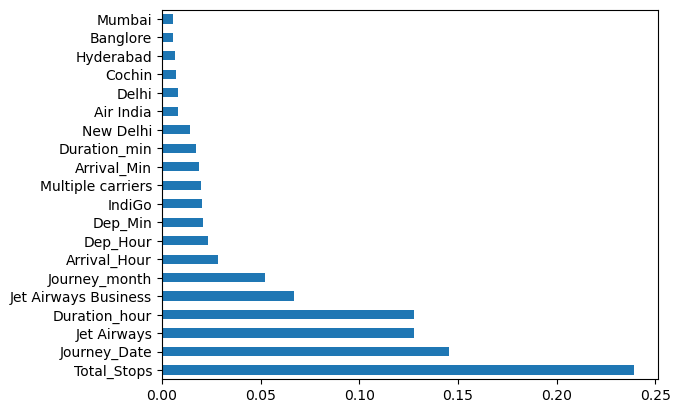

In [50]:
a.nlargest(20).plot(kind="barh")

In [51]:
a.nlargest(20)

Total_Stops             0.239248
Journey_Date            0.145255
Jet Airways             0.127611
Duration_hour           0.127551
Jet Airways Business    0.066906
Journey_month           0.052288
Arrival_Hour            0.028624
Dep_Hour                0.023511
Dep_Min                 0.020755
IndiGo                  0.020134
Multiple carriers       0.019733
Arrival_Min             0.018627
Duration_min            0.017406
New Delhi               0.014463
Air India               0.008405
Delhi                   0.008190
Cochin                  0.007248
Hyderabad               0.006761
Banglore                0.005900
Mumbai                  0.005810
dtype: float64

In [52]:
data.shape

(10682, 39)

In [53]:
# apply all Regression algorithm in ML

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor # accurate regression model banate hain jo kai choti-choti models ko combine karke badi accuracy achieve karta hai.accuracy(precision_score ,f1score) ko balance karta hai or best accuracy find karta hai  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [55]:
model=[DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,KNeighborsRegressor,SVR]

for i in model:
    reg=i()
    reg=reg.fit(x_train,y_train)
    print(i,"accuracy:",reg.score(x_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy: 0.6938554069105358
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy: 0.803080624023833
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy: 0.34049834477573515
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy: 0.5745822827320851
<class 'sklearn.svm._classes.SVR'> accuracy: 0.004675687532239681


# apply Kflod and Cross validation

In [56]:
# change random state 
# kflod mathod -- kisme random state ki accuracy achi milti hai vo btta hai

In [57]:
from sklearn.model_selection import KFold,cross_val_score

In [58]:
models=[]
models.append(("KNN",KNeighborsRegressor()))
models.append(("DecisionTree",DecisionTreeRegressor()))
models.append(("RF",RandomForestRegressor()))
models.append(("AdaBoost",AdaBoostRegressor()))
models.append(("SVm",SVR()))


In [59]:
results=[]
names=[]
for name,model in models:
    a=KFold(5)
    cv_result=cross_val_score(model,x_train,y_train,cv=a)
    names.append(name)
    results.append(cv_result)



In [60]:
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.535879323535361
DecisionTree 0.677988097269354
RF 0.7993389710234218
AdaBoost 0.34845745152697505
SVm -0.0056493059101819345


In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
y_pred=reg_rf.predict(x_test)

In [64]:
reg_rf.score(x_train,y_train)

0.9558674586025827

In [65]:
reg_rf.score(x_test,y_test)

0.8041967501731482

In [66]:
#hyperparameter

In [67]:
model_final=RandomForestRegressor(n_estimators= 700,
 min_samples_split= 15,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 20)

In [68]:
model_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=15,
                      n_estimators=700)

In [69]:
model_final.score(x_train,y_train)

0.8943144655532734

In [70]:
model_final.score(x_test,y_test)

0.815939272584176